## Monte Carlo Simulation

#### Step 1: 
Simulate potential price paths of the underlying asset
#### Step 2: 
Calculate the option payoff for each of these price paths
#### Step 3: 
AVerage the payoff and calculate the Present Value to determine the option price

In [1]:
# Importing libraries
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt

# Machine information and package version
from watermark import watermark
%load_ext watermark
%watermark -a "Gurpreet Singh Sodhi" -u -v -d -m -iv

Author: Gurpreet Singh Sodhi

Last updated: 2023-04-19

Python implementation: CPython
Python version       : 3.7.11
IPython version      : 7.29.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores   : 8
Architecture: 64bit

json      : 2.0.9
numpy     : 1.20.3
pandas    : 1.3.4
matplotlib: 3.5.0



## User Defined Function

In [43]:
# Define simulation function
def simulate_path(s0,mu,sigma,horizon,timesteps,n_sims):
    
    # Set the random see for reproductivity
    random.seed(1000)
    
    # Read parameters
    S0=s0
    r=mu
    T=horizon
    t=timesteps
    n=n_sims
    
    # define other variables
    dt=T/t
    S=zeros((t,n))
    S[0]=S0
    
    for i in range(0,t-1):
        w=random.standard_normal(n)
#         S[i+1]=S[i]*(1 + r*dt + sigma*sqrt(dt)*w)
        S[i+1] = S[i] * (1 + r*dt + sigma*sqrt(dt)*w)
        
    return S

<!-- Simulated returns -->

## Simulated paths

In [44]:
price_path=pd.DataFrame(simulate_path(100,0.05,0.2,1,252,100000))
price_path.head(5)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,99.006319,100.424177,99.987736,100.831613,99.640873,100.510533,99.884483,99.415119,100.769516,99.434415,...,98.431850,98.396406,98.546708,100.350198,103.749324,102.276834,100.103156,102.609697,99.621451,99.776354
2,98.772696,101.306576,100.500259,98.265710,101.998632,102.486501,99.248233,98.019509,99.363981,100.376885,...,97.244758,99.283436,99.171812,100.198994,104.824205,102.394826,101.285135,104.341333,100.867852,101.183966
3,101.163655,99.565234,100.956377,97.761344,100.533398,102.297967,99.916524,98.441704,98.038592,100.551019,...,97.481344,98.013531,97.915211,101.528776,107.447987,104.889369,99.950671,104.646264,101.318640,100.928354
4,100.807008,99.990229,101.657761,98.285653,100.977482,99.711556,100.173825,97.727654,98.568118,101.110790,...,96.650324,98.426799,98.043623,101.552236,104.518050,103.539633,102.179628,104.672628,102.481339,99.941549


## Histogram of Simulated Paths

Text(0.5, 1.0, 'Simulated Geometric Brownian Motion at Maturity')

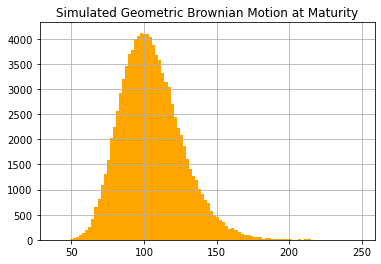

In [45]:
# Plot the histogram of the simulated price path at maturity
price_path.iloc[-1].hist(bins=100,color='orange')
plt.title('Simulated Geometric Brownian Motion at Maturity')

## Visualization of Simulated Paths

Text(0.5, 1.0, 'Monte Carlo Simulated Asset Prices')

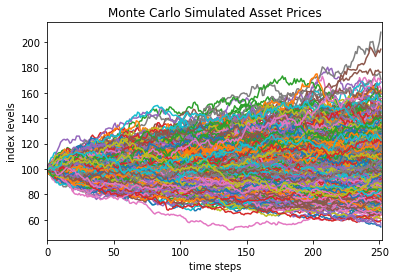

In [46]:
# Plot initial 1000 simulated path using matplotlib
plt.plot(price_path.iloc[:,:1000])
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.title('Monte Carlo Simulated Asset Prices')

In [47]:
# Call the simulation function
S=simulate_path(100,0.05,0.2,1,252,100000)

# Deine parameters
K=100;r=0.05;T=1

# Calculate the discounted value of the expected payoff
C0=exp(-r*T)*mean(maximum(0,S[-1]-K))
P0=exp(-r*T)*mean(maximum(0,K-S[-1]))

# Print the values
print(f'European Call Option Value is {C0:0.4f}')
print(f'European Put Option Value is {P0:0.4f}')

European Call Option Value is 10.4392
European Put Option Value is 5.5531


## Visualize payoff for call and put

Text(0.5, 0.98, 'Option Payoff at Maturity')

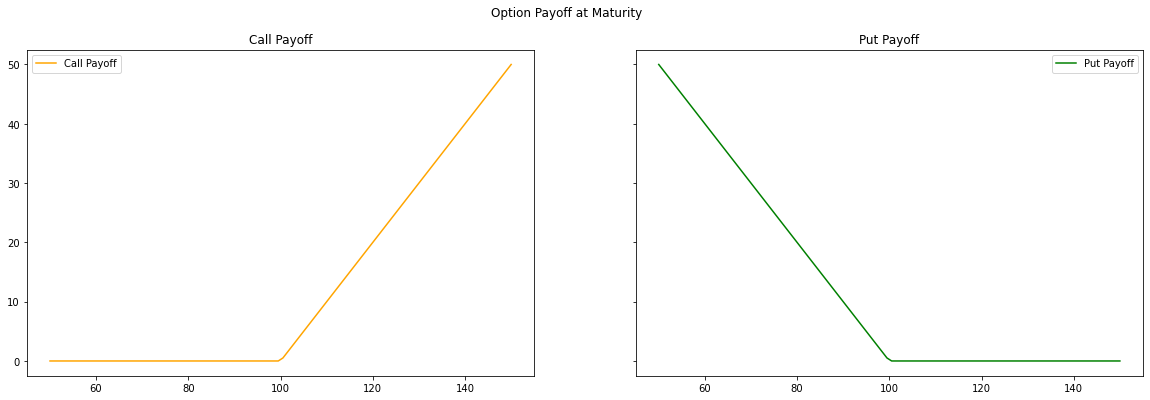

In [49]:
# range of spot prices
sT=linspace(50,150,100)

# visualize call and put price for range of spot prices
figure, axes = plt.subplots(1,2,figsize=(20,6),sharey=True)
title,payoff,color,label=['Call Payoff', 'Put Payoff'],[maximum(0,sT-K),maximum(0,K-sT)],['orange','green'],['Call Payoff','Put Payoff']

# plot payoff
for i in range(2):
    axes[i].plot(sT,payoff[i],color=color[i],label=label[i])
    axes[i].set_title(title[i])
    axes[i].legend()
    
figure.suptitle('Option Payoff at Maturity')

## Asian Call Option

In [53]:
# Call the simulation function
S=simulate_path(100,0.05,0.2,1,252,100000)

# Define parameters
K=100;r=0.05;T=1

# Average price
A=S.mean(axis=0)

C0=exp(-r*T)*mean(maximum(0,A-K))
P0=exp(-r*T)*mean(maximum(0,K-A))

# Print the values
print(f"Asian Call Option Value is {C0:0.4f}")
print(f"Asian Put Option Value is {P0:0.4f}")

Asian Call Option Value is 5.7525
Asian Put Option Value is 3.3301


## Up and Out Barrier Call option

In [55]:
# Call the simulation function
S=simulate_path(100,0.05,0.2,1,252,100000)

# Define parameters
K=100;B=150;r=0.05;sigma=0.2;T=3;t=756;dt=T/t;n=100000;rebate=30;value=0

# Barrier shift - continuity correction for discrete monitoring
B_shift=B*exp(0.5826*sigma*sqrt(dt))
B_shift

# Calculate the discounted value of the expected payoff
for i in range(n):
    if S[:,i].max() < B_shift:
        value += maximum(0,S[-1,i]-K)
    else:
        value += rebate
        
C0=exp(-r*T)*value/n

# print the value
print(f'UP and Out Barrier Call Option Value: {C0:0.4f}')

UP and Out Barrier Call Option Value: 8.4509


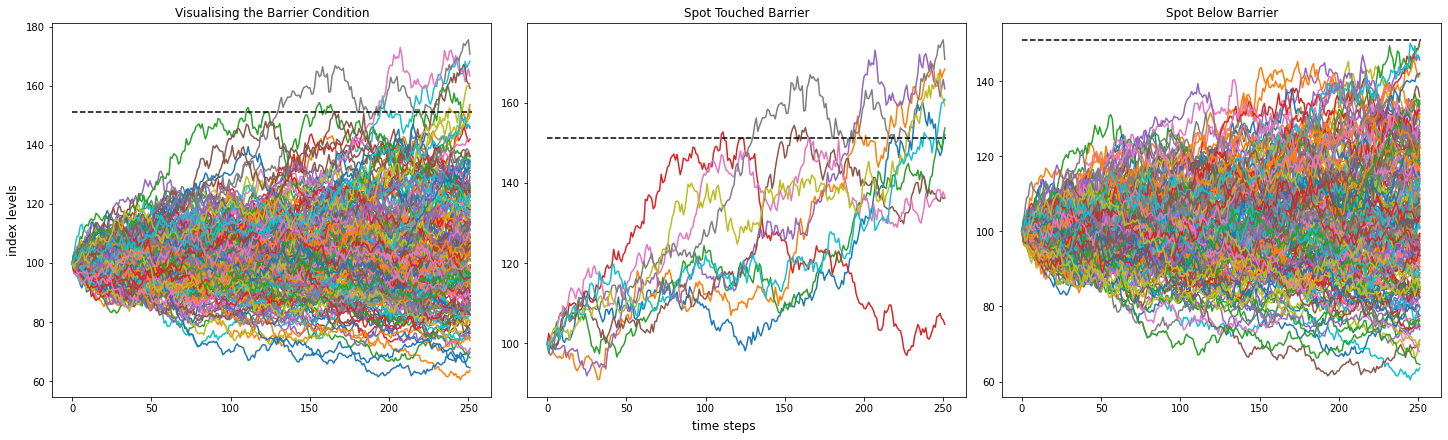

In [57]:
figure,axes=plt.subplots(1,3, figsize=(20,6), constrained_layout=True)
title = ['Visualising the Barrier Condition', 'Spot Touched Barrier', 'Spot Below Barrier']

axes[0].plot(S[:,:200])
for i in range(200):
    axes[1].plot(S[:,i]) if S[:,i].max()>B_shift else axes[2].plot(S[:,i])
    
for i in range(3):
    axes[i].set_title(title[i])
    axes[i].hlines(B_shift,0,252,colors='k',linestyles='dashed')
    
figure.supxlabel('time steps')
figure.supylabel('index levels')

plt.show()